# IMPORT LIBRARIES

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib


# Load Dataset

In [18]:

df = pd.read_csv("C:/Users/abdullah khan/Desktop/project/car_price_prediction_ (1).csv ")
df.head()



,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


# (EDA)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [20]:

df.describe()


,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [21]:
#Check Missing Values
df.isnull().sum()


Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

# Fix Missing Values (Automatic)

In [22]:
# Numerical columns
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Feature Engineering (Encoding)

In [23]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Visualization

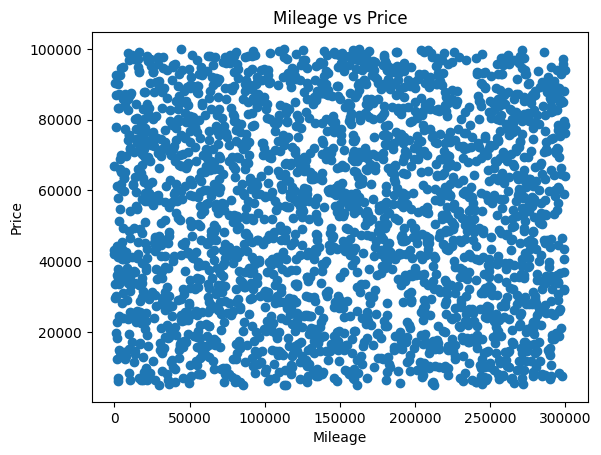

In [24]:
#GRAPH 1: Year vs Price
plt.figure()
plt.scatter(df["Mileage"], df["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.show()


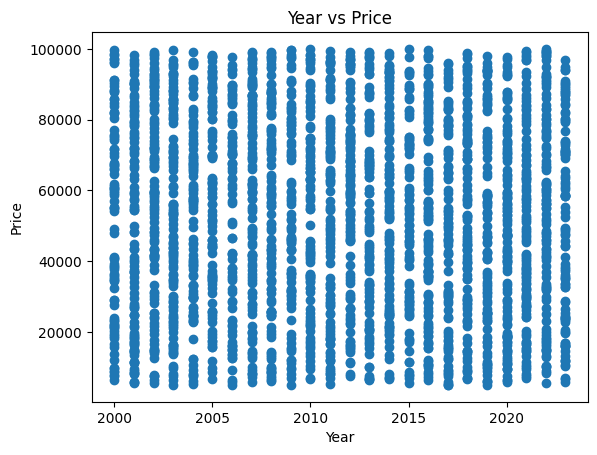

In [25]:
# GRAPH 2: Engine Size vs Price
plt.figure()
plt.scatter(df["Year"], df["Price"])
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Year vs Price")
plt.show()


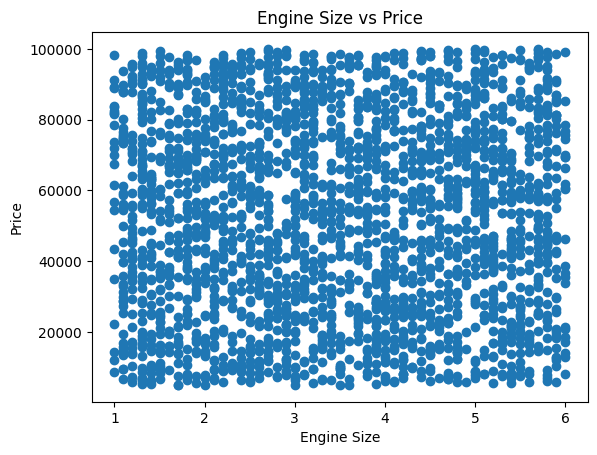

In [26]:
#GRAPH 3: Engine Size vs Price
plt.figure()
plt.scatter(df["Engine Size"], df["Price"])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.show()


# Define Independent & Dependent Variables

In [27]:
X = df.drop(["Price", "Car ID"], axis=1)
y = df["Price"]


# Train–Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Machine Learning Model


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Model Evaluation

In [30]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 759016533.5678777
R2 Score: -0.0019314828693972608


# Save Model using Joblib

In [31]:
joblib.dump(model, "car_price_model.pkl")


['car_price_model.pkl']


---

### Problem We Faced

Initially, the Gradio dropdowns for categorical columns (Condition, Brand, Model, etc.) were showing **numbers (0, 1, 2…)** instead of the actual categories like `Toyota`, `Hilux`, or `New`.

This happened because:

1. During model training, we **encoded categorical columns** using LabelEncoder to convert text values into numbers.
2. When building the Gradio interface, we used these **encoded numeric columns** directly for dropdown choices.
3. As a result, users saw numeric codes instead of meaningful category names.

---

### How We Fixed It

1. **Dropdowns use original categorical names**:
   We fetched the unique values directly from the original dataset (before encoding).

   ```python
   dropdown_options = {col: sorted(df[col].unique()) for col in categorical_cols}
   ```

2. **Prediction function handles encoding internally**:
   When a user selects a category from the dropdown, the selected value is converted into the numeric form that the trained model expects using LabelEncoder.

   ```python
   cond_val = label_encoders['Condition'].transform([condition])[0]
   ```

3. **Model receives numeric input**:
   The model still works with numbers, but the user interface shows human-readable category names.

---

### Key Points & Best Practices for Future Datasets

1. **Always separate UI display from model input**:

   * UI (Gradio, Flask, etc.) should show readable category names.
   * Model input should be numeric (encoded).

2. **Store LabelEncoders**:

   * Fit LabelEncoders during training.
   * Save them (or recreate from training dataset) so you can convert user inputs consistently.

3. **Avoid using already encoded numeric columns for UI**:

   * Always use the original dataset’s categorical values to populate dropdowns.

4. **Check dropdown outputs**:

   * Before launching the interface, print dropdown options to ensure they match the original dataset categories.

5. **Document categorical mappings**:

   * Keep track of which numeric code corresponds to which category for debugging and validation.

---




In [36]:
import pandas as pd
import numpy as np
import gradio as gr
import joblib
from sklearn.preprocessing import LabelEncoder

# Load dataset (original categorical columns, no encoding here)
df = pd.read_csv("C:/Users/abdullah khan/Desktop/project/car_price_prediction_ (1).csv")

# Identify categorical columns
categorical_cols = ['Condition', 'Transmission', 'Fuel Type', 'Brand', 'Model']

# Create LabelEncoders for prediction (model needs numbers)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])  # fit on original categorical names
    label_encoders[col] = le

# Create dropdown options directly from original data
dropdown_options = {col: sorted(df[col].unique()) for col in categorical_cols}

# Load trained model
model = joblib.load("car_price_model.pkl")

# Prediction function
def predict_price(year, engine_size, mileage, condition, transmission, fuel_type, brand, model_name):
    # Encode user-selected categorical values for model input
    cond_val = label_encoders['Condition'].transform([condition])[0]
    trans_val = label_encoders['Transmission'].transform([transmission])[0]
    fuel_val = label_encoders['Fuel Type'].transform([fuel_type])[0]
    brand_val = label_encoders['Brand'].transform([brand])[0]
    model_val = label_encoders['Model'].transform([model_name])[0]

    input_data = np.array([[year, engine_size, mileage, cond_val, trans_val, fuel_val, brand_val, model_val]])
    prediction = model.predict(input_data)
    return round(prediction[0], 2)

# Gradio interface
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Engine Size"),
        gr.Number(label="Mileage"),
        gr.Dropdown(choices=dropdown_options['Condition'], label="Condition"),
        gr.Dropdown(choices=dropdown_options['Transmission'], label="Transmission"),
        gr.Dropdown(choices=dropdown_options['Fuel Type'], label="Fuel Type"),
        gr.Dropdown(choices=dropdown_options['Brand'], label="Brand"),
        gr.Dropdown(choices=dropdown_options['Model'], label="Model")
    ],
    outputs="number",
    title="Car Price Prediction System"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.




---

## Project Title

Car Price Prediction Using Machine Learning

---

## Problem Statement

The objective of this project is to predict the price of a car based on its features such as brand, year, engine size, mileage, fuel type, transmission, condition, and model. This helps in estimating a fair market value for cars using historical data.

---

## Dataset Description

The dataset contains the following columns:
Car ID, Brand, Year, Engine Size, Fuel Type, Transmission, Mileage, Condition, Model, and Price.
The target variable is Price, while all other columns are used as input features.

---

## Tools and Libraries Used

We used Python with the following libraries:
Pandas and NumPy for data handling,
Matplotlib and Seaborn for visualization,
Scikit-learn for machine learning,
Joblib for saving the trained model,
Gradio for deploying a simple user interface.

---

## Data Loading and Exploration

The dataset was loaded using pandas.
We used info() and describe() functions to understand data types, missing values, and basic statistics.

---

## Data Cleaning

Missing numerical values were filled using the mean of each column.
Missing categorical values were filled using the most frequent value (mode).
This step ensures that the model does not fail due to incomplete data.

---

## Feature Engineering

Categorical variables such as Brand, Fuel Type, Transmission, Condition, and Model were converted into numerical form using Label Encoding.
This is required because machine learning models work only with numerical data.

---

## Exploratory Data Analysis

We created graphs to understand the relationship between features and price:
Mileage vs Price,
Year vs Price,
Engine Size vs Price.
These graphs show how car price changes with usage, age, and engine capacity.

---

## Independent and Dependent Variables

The dependent variable is Price.
Independent variables include all other columns except Price and Car ID.
Car ID was removed because it does not contribute to price prediction.

---

## Train and Test Split

The dataset was split into training and testing sets using an 80-20 ratio.
Training data is used to build the model, while testing data is used to evaluate its performance.

---

## Machine Learning Model

We used Linear Regression because it is simple, fast, and easy to explain.
The model was trained on the training dataset to learn the relationship between features and car price.

---

## Model Evaluation

The model was evaluated using Mean Squared Error and R² score.
Mean Squared Error measures prediction error, and R² score measures how well the model fits the data.

---

## Model Saving

The trained model was saved using Joblib.
This allows the model to be reused without retraining.

---

## Model Deployment

A simple Gradio interface was created.
The user enters car details such as year, engine size, mileage, and condition.
The model predicts and displays the estimated car price.

---

## Conclusion

This project successfully predicts car prices using machine learning.
We performed data cleaning, feature engineering, visualization, model training, evaluation, and deployment.
The system provides quick and reliable car price predictions using a simple user interface.


